https://developers.naver.com/docs/clova/api/CFR/API_Guide.md#Overview

In [4]:
!pip install pillow

In [5]:
!pip install requests

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

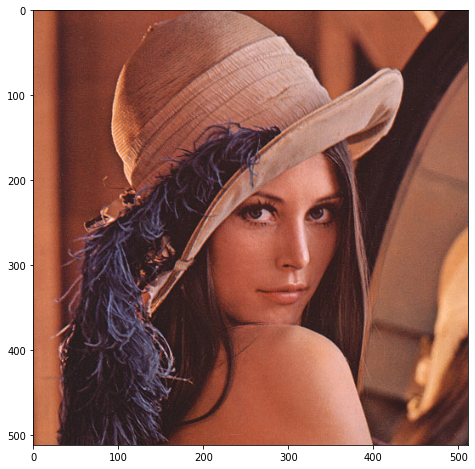

In [8]:
img = mpimg.imread('1.png')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [9]:
import requests

In [10]:
client_id = "guNXoD62a25MMK2_7cT1"
client_secret = "MYWC9jnZJ3"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open('1.png','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)

In [11]:
import json

In [12]:
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 512,
            "height": 512
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "젬마앳킨슨",
                "confidence": 0.273977
            }
        }
    ]
}


In [13]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('1.png','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 512,
            "height": 512
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 219,
                "y": 209,
                "width": 152,
                "height": 152
            },
            "landmark": null,
            "gender": {
                "value": "female",
                "confidence": 0.999986
            },
            "age": {
                "value": "25~29",
                "confidence": 0.744944
            },
            "emotion": {
                "value": "neutral",
                "confidence": 0.999999
            },
            "pose": {
                "value": "right_face",
                "confidence": 0.607867
            }
        }
    ]
}


In [14]:
detect_result = parsed

In [15]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [16]:
detect_result['faces']

[{'roi': {'x': 219, 'y': 209, 'width': 152, 'height': 152},
  'landmark': None,
  'gender': {'value': 'female', 'confidence': 0.999986},
  'age': {'value': '25~29', 'confidence': 0.744944},
  'emotion': {'value': 'neutral', 'confidence': 0.999999},
  'pose': {'value': 'right_face', 'confidence': 0.607867}}]

In [17]:
detect_result['faces'][0]

{'roi': {'x': 219, 'y': 209, 'width': 152, 'height': 152},
 'landmark': None,
 'gender': {'value': 'female', 'confidence': 0.999986},
 'age': {'value': '25~29', 'confidence': 0.744944},
 'emotion': {'value': 'neutral', 'confidence': 0.999999},
 'pose': {'value': 'right_face', 'confidence': 0.607867}}

In [18]:
detect_result['faces'][0]['roi']

{'x': 219, 'y': 209, 'width': 152, 'height': 152}

In [19]:
detect_result['faces'][0]['gender']

{'value': 'female', 'confidence': 0.999986}

In [20]:
detect_result['faces'][0]['age']

{'value': '25~29', 'confidence': 0.744944}

In [21]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999999}

In [22]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [23]:
annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)

In [24]:
import matplotlib.patches as patches

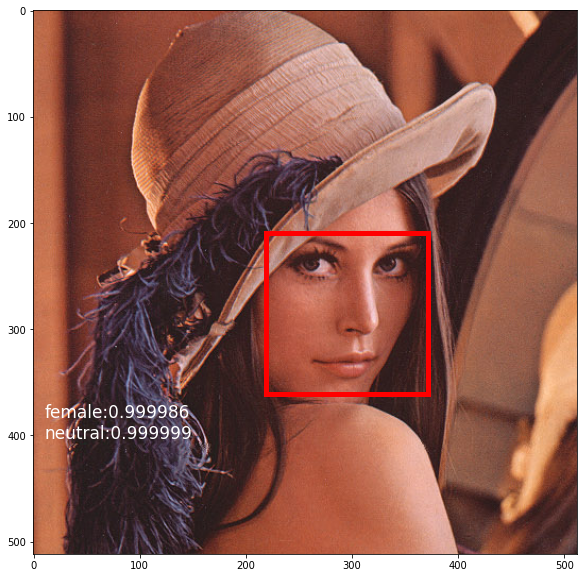

In [25]:
img = mpimg.imread('1.png')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
ax.add_patch(rect_face)

plt.text(10,400, annotation, wrap=True, fontsize=17, color='white')
plt.show()

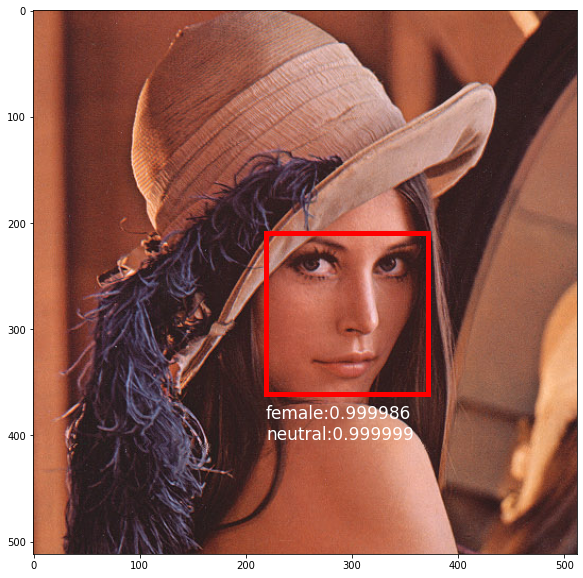

In [26]:
img = mpimg.imread('1.png')

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(img)


for each in detect_result['faces']:
    
    x, y, w, h = each['roi'].values()
    gender, confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()

    rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
    annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)
    plt.text(x,y+h+40, annotation, wrap=True, fontsize=17, color='white')
    ax.add_patch(rect_face)

    
plt.show()